In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

import sklearn.neighbors

In [57]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    return full_country_stats[["GDP per capita", 'Life satisfaction']]

In [58]:
#loading the data into variables
path='C:\\Users\\vivsr\\Downloads\\oecd_bli_2015.csv'
oecd_bli=pd.read_csv(path,thousands=',')
path2='C:\\Users\\vivsr\\Downloads\\gdp_per_capita.csv'
gdp_per_capita=pd.read_csv(path2,thousands=',',delimiter='\t',encoding='latin1',na_values='n/a')


In [59]:
#prepare the data
country_stats=prepare_country_stats(oecd_bli,gdp_per_capita)
#giving the x values 
X=np.c_[country_stats['GDP per capita']]

y=np.c_[country_stats['Life satisfaction']]

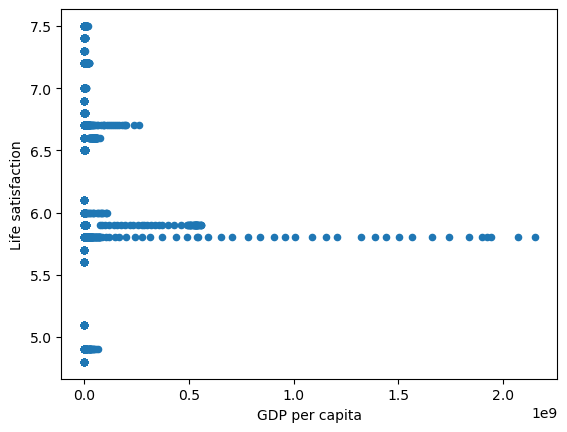

In [60]:
# visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()  # Don't forget to call the function with parentheses




In [61]:
model =sklearn.linear_model.LinearRegression()


In [62]:
model.fit(X,y)

LinearRegression()

In [63]:
# making prediction for cyprus
X_new=[[22587]]# code for cyprus
print(model.predict(X_new))

[[6.6862701]]


In [67]:
model =sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [68]:
model.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [69]:
# making prediction for cyprus
X_new=[[22587]]# code for cyprus
print(model.predict(X_new))

[[6.33333333]]
